<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Factory/Kaggle_quality_prediction_mining_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
df = pd.read_csv("/content/drive/My Drive/Data/MiningProcess_Flotation_Plant_Database.csv",
                 decimal=",",parse_dates=["date"],infer_datetime_format=True).drop_duplicates()
print(df.shape)
df.head()

(736282, 24)


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


**Content**

The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab. Target is to predict the last column, which is the % of silica in the iron ore concentrate.

**Inspiration**

I have been working in this dataset for at least six months and would like to see if the community can help to answer the following questions:

Is it possible to predict % Silica Concentrate every minute?

How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigatin the % of iron that could have gone to tailings.

Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?








In [7]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


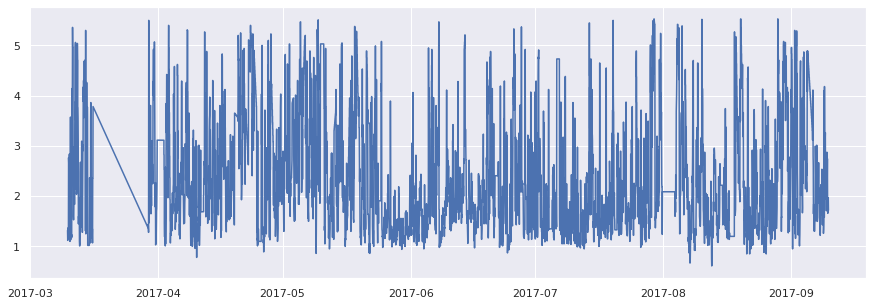

In [8]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(df.date,df['% Silica Concentrate'])
plt.show()

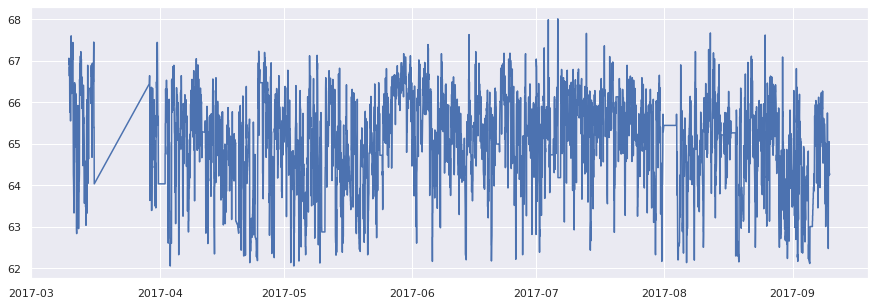

In [9]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(df.date,df['% Iron Concentrate'])
plt.show()

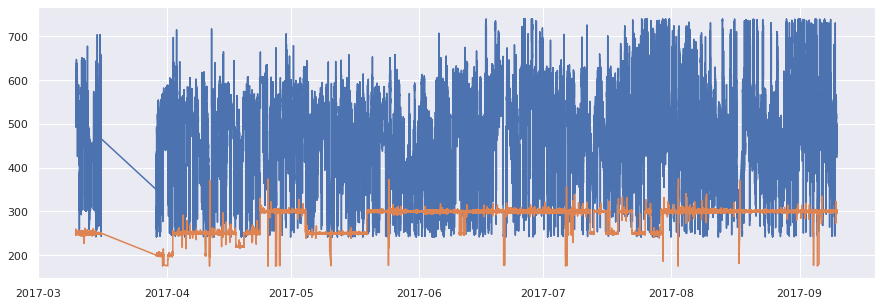

In [10]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(df.date,df['Amina Flow'])
ax.plot(df.date,df['Flotation Column 01 Air Flow'])
plt.show()

In [11]:
df.corr(method='pearson').sort_values(by='% Silica Concentrate',ascending=False)['% Silica Concentrate']

% Silica Concentrate            1.000000
Amina Flow                      0.156981
% Silica Feed                   0.072676
Ore Pulp Density                0.047002
Flotation Column 02 Level       0.031790
Flotation Column 01 Level       0.017859
Flotation Column 03 Level       0.014843
Ore Pulp Flow                   0.008497
Flotation Column 04 Air Flow   -0.004770
Flotation Column 05 Air Flow   -0.008930
Flotation Column 06 Air Flow   -0.049692
Starch Flow                    -0.066813
Flotation Column 07 Air Flow   -0.071685
% Iron Feed                    -0.077179
Flotation Column 06 Level      -0.102115
Flotation Column 07 Level      -0.140819
Ore Pulp pH                    -0.147211
Flotation Column 04 Level      -0.148886
Flotation Column 02 Air Flow   -0.167259
Flotation Column 05 Level      -0.168466
Flotation Column 03 Air Flow   -0.218834
Flotation Column 01 Air Flow   -0.219076
% Iron Concentrate             -0.800598
Name: % Silica Concentrate, dtype: float64

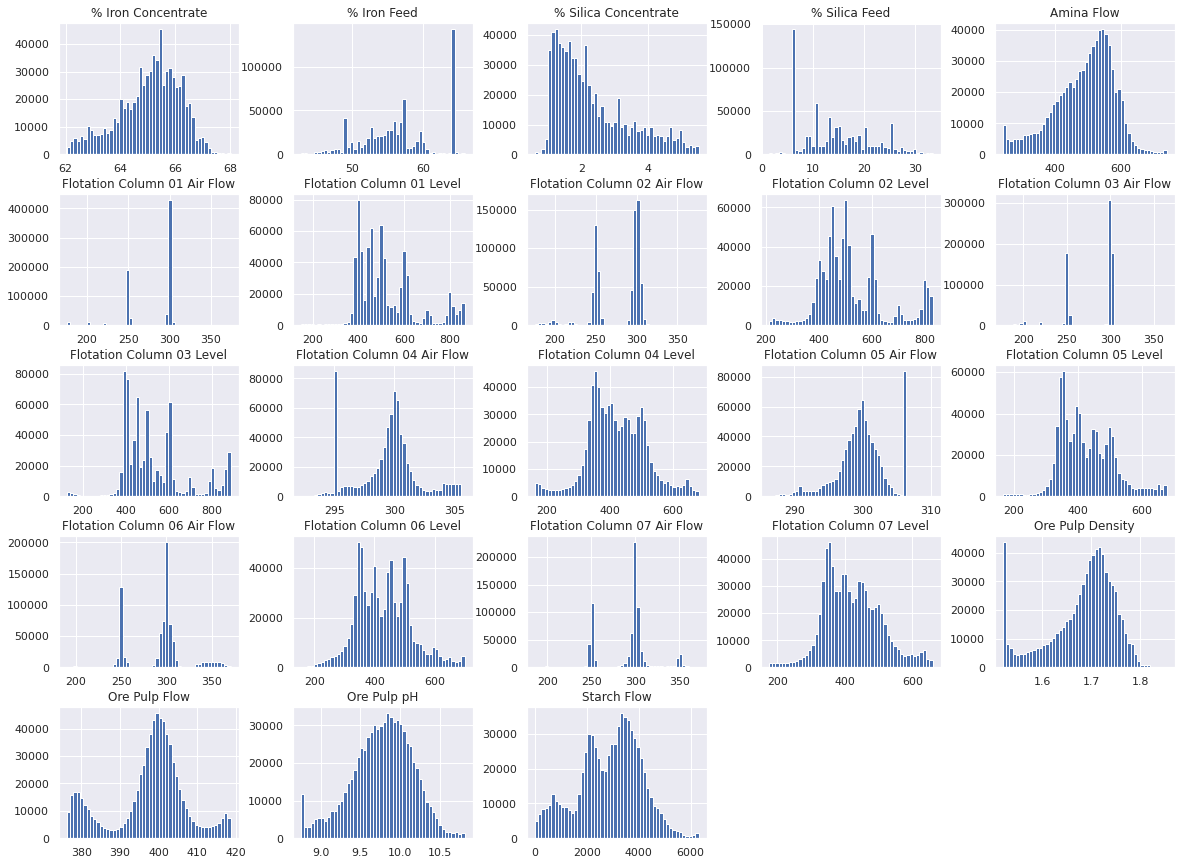

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

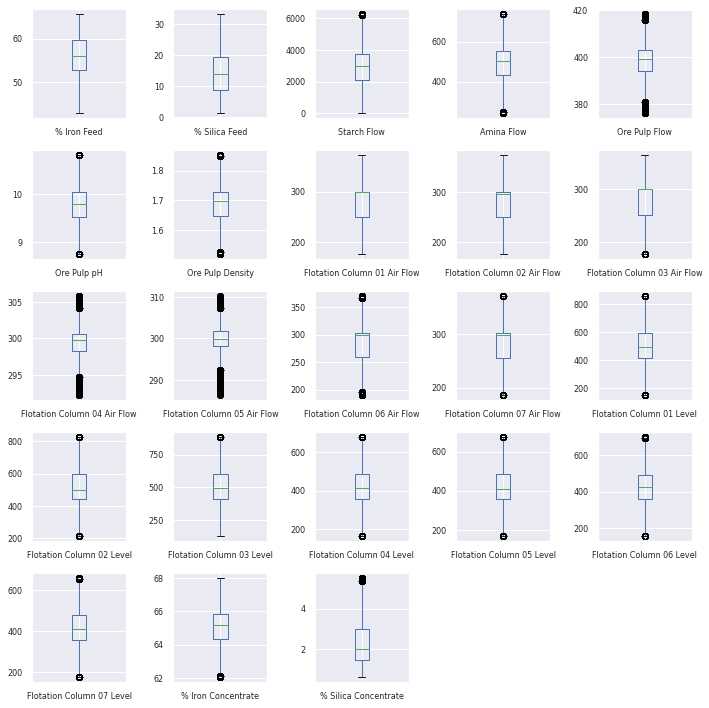

In [13]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False,
fontsize=8,figsize=(10,10))
plt.tight_layout()

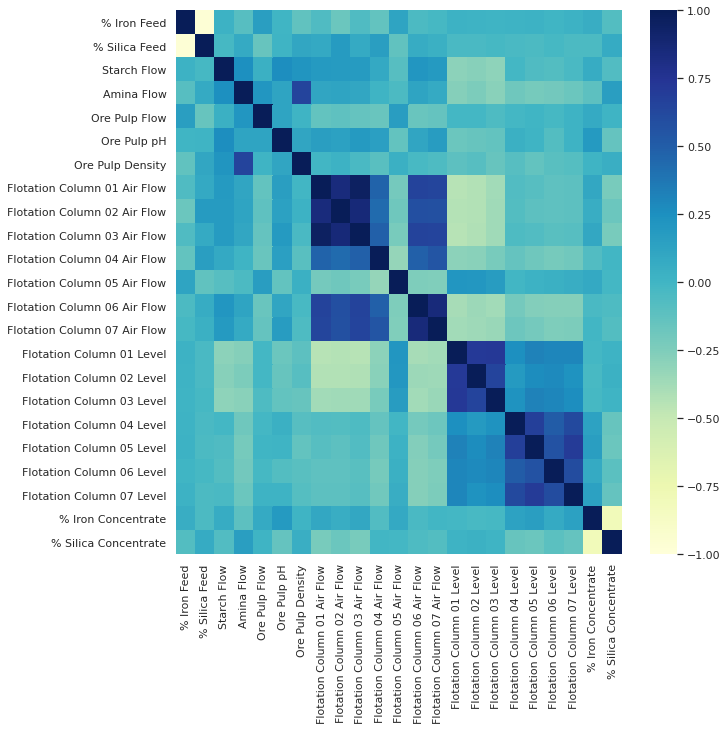

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, #annot = True,
            cmap="YlGnBu",ax=ax)

# ML (no prediction, real time only)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

# Score:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
#ML normal ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.linear_model import TheilSenRegressor, HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

#ML ensembles
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

#Special
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [16]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [17]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [41]:
X=df.drop(['date','% Silica Concentrate','% Iron Concentrate'],axis=1)
y=df['% Silica Concentrate']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [43]:
#transform=StandardScaler()
transform=RobustScaler()

X_train_trans = transform.fit_transform(X_train)
X_test_trans = transform.fit_transform(X_test)

In [21]:
# Creating a list of the classifiers
regression = {

    'LR':LinearRegression(),
    'LASSO':Lasso(), 
    'Ridge':Ridge(), 
    'EN':ElasticNet(),
    #'KNN':KNeighborsRegressor(), # kha lau
    #'CART':DecisionTreeRegressor(), 
    #'SVR':SVR(),
    # New , Theil, Huber Regressor:
    'RANSAC':RANSACRegressor(),
    #'TheilSen':TheilSenRegressor(),
    'Huber':HuberRegressor(),
    #New: Poly nominal
    #'Poly2':Pipeline([('Poly2', PolynomialFeatures(degree=2)),
    #                 ('linear', LinearRegression(fit_intercept=False))]),
    
    #Ensemble:
    #'AB':AdaBoostRegressor(), #Bagging (very long)
    #'GBM':GradientBoostingRegressor(),  #Boosting
    #'RF':RandomForestRegressor(), #Boosting
    #'ET':ExtraTreesRegressor(), #Bagging (very long)
    #New from Matt cookbook
    #'XGB':XGBRegressor(), #New Boosting
    'LGBM':LGBMRegressor(), #New Boosting   
}

In [22]:
#Cross validate
import time
num_folds = 3
seed = 7

scoring = {'mse' : make_scorer(mean_squared_error), 
           'r2' : make_scorer(r2_score),
           }

names = []
train_rmse=[]
train_r2=[]
test_rmse=[]
test_r2=[]
fit_time=[]
time_=[]

for name, model in regression.items():
  print(name)
  start=time.time()
  estimator = model
  cv_results = cross_validate(estimator, X_train, y_train, cv=3, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_rmse.append(np.sqrt(cv_results['train_mse'].mean()))
  train_r2.append(cv_results['train_r2'].mean())
  

  test_rmse.append(np.sqrt(cv_results['test_mse'].mean()))
  test_r2.append(cv_results['test_r2'].mean())
  

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_mse: %0.2f train_r2: %0.2f \
  test_mse: %0.2f test_r2: %0.2f fit_time: %0.2f" % 
       (name, cv_results['train_mse'].mean(),cv_results['train_r2'].mean(),
       cv_results['test_mse'].mean(),cv_results['test_r2'].mean(),
       cv_results['fit_time'].mean()))


LR
time : 0.968 

LR: train_mse: 1.07 train_r2: 0.15   test_mse: 1.07 test_r2: 0.15 fit_time: 0.28
LASSO
time : 2.414 

LASSO: train_mse: 1.12 train_r2: 0.11   test_mse: 1.12 test_r2: 0.11 fit_time: 0.77
Ridge
time : 0.478 

Ridge: train_mse: 1.07 train_r2: 0.15   test_mse: 1.07 test_r2: 0.15 fit_time: 0.12
EN
time : 3.085 

EN: train_mse: 1.12 train_r2: 0.12   test_mse: 1.12 test_r2: 0.12 fit_time: 0.99
RANSAC
time : 5.104 

RANSAC: train_mse: 4.27 train_r2: -2.37   test_mse: 4.29 test_r2: -2.38 fit_time: 1.66
Huber


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

time : 25.673 

Huber: train_mse: 1.13 train_r2: 0.11   test_mse: 1.13 test_r2: 0.11 fit_time: 8.52
LGBM
time : 18.802 

LGBM: train_mse: 0.50 train_r2: 0.61   test_mse: 0.51 test_r2: 0.60 fit_time: 4.04


In [23]:
df_results_val=pd.DataFrame(list(zip(names,test_rmse,test_r2,
                                     train_rmse,train_r2,
                                     fit_time,time_)),
                  columns=['Names','test_rmse','test_r2',
                           'train_rmse','train_r2',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_rmse',ascending=True)
df_results_val

,Names,test_rmse,test_r2,train_rmse,train_r2,fit_time,time
6,LGBM,0.710961,0.601411,0.706901,0.605950,4.044062,18.801888
2,Ridge,1.036625,0.152622,1.036570,0.152714,0.123991,0.477927
0,LR,1.036625,0.152622,1.036570,0.152714,0.282713,0.967956
3,EN,1.056384,0.120011,1.056347,0.120074,0.992439,3.084972
1,LASSO,1.059753,0.114389,1.059724,0.114439,0.768967,2.413636
5,Huber,1.060824,0.112598,1.060786,0.112662,8.522655,25.673430
4,RANSAC,2.070319,-2.379899,2.066848,-2.368624,1.664305,5.103963


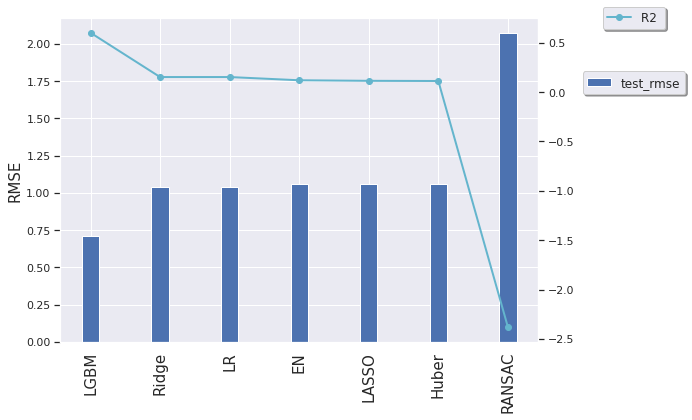

In [24]:
# Define name:
name=df_results_val['Names']
test_rmse=df_results_val['test_rmse']
test_r2=df_results_val['test_r2']
#time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_rmse, color = 'b', width = 0.25,label='test_rmse')
#rects2 = ax.plot(x, test_r2, color = 'g',marker='o',label='test_r2')

ax2 = ax.twinx()
ax2.plot(x,test_r2,color ='c',marker='o',lw=2,label='R2 ')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15,rotation=90)
ax.set_ylabel('RMSE',fontsize=15)
ax2.set_ylabel('R2',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(1.2, 0.8),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(1.2,1),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

In [25]:
model=LGBMRegressor()
model.fit(X_train_trans,y_train)
y_test_pred=model.predict(X_test_trans)
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Kaggle: 0.72002

test rmse: 0.7200251402043237


In [44]:
model=LGBMRegressor()
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('test mae:', mean_absolute_error(y_test, y_test_pred))
# Khong cần robust scaler

test rmse: 0.7094464193926248
test mae: 0.5363262625655223


# LSTM predict

## Many to many (multy features)

In [27]:
# univariate mlp example
import warnings
from numpy import array
import matplotlib.pyplot as plt
from keras import optimizers
from keras import backend
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,Bidirectional
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [28]:
split_number=0.80
n_steps_in  = 7
n_steps_out = 5
split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)

In [29]:
print(training_set.shape)
print(test_set.shape)

(589025, 24)
(147257, 24)


In [30]:
X=training_set.drop(['date','% Silica Concentrate','% Iron Concentrate'],axis=1)
y=training_set['% Silica Concentrate']

In [31]:
print(X.shape)
print(y.shape)

(589025, 21)
(589025,)


In [32]:
# split a univariate sequence into samples
def split_sequence(X,y,n_steps_in, n_steps_out):
  X_prepare, y_prepare = list(), list()
  for i in range(len(X)):
    #if i%10000 ==0: 
    #  print(i)
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
    if out_end_ix > len(X):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = X[i:end_ix], y[end_ix:out_end_ix]
    X_prepare.append(seq_x)
    y_prepare.append(seq_y)
  return array([np.array(X) for X in X_prepare]), array(y_prepare)

In [ ]:
X_train_array, y_train_array = split_sequence(X,y, n_steps_in, n_steps_out)

In [ ]:
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X=inputs.drop(['date','% Silica Concentrate','% Iron Concentrate'],axis=1)
y=inputs['% Silica Concentrate']

X_test_array, y_test_array = split_sequence(X,y, n_steps_in, n_steps_out)
print(X_test_array.shape)
print(y_test_array.shape)

### Model LSTM 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                14400     
_________________________________________________________________
dense (Dense)                (None, 5)                 255       
Total params: 14,655
Trainable params: 14,655
Non-trainable params: 0
_________________________________________________________________


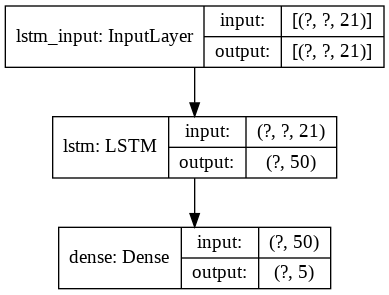

In [35]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, X_train_array.shape[2]))) # 7 timesteps, 21 features
model.add(Dense(n_steps_out)) # 5 timestep
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [36]:
callbacks = [EarlyStopping(monitor="val_loss", patience=2, #2 or 1 thoi
                           mode='min',restore_best_weights=True),
            ]
history = model.fit(X_train_array, y_train_array, epochs=20, 
                    validation_split=0.2, verbose=1,callbacks=callbacks)

Epoch 1/20
14726/14726 [==============================] - 179s 12ms/step - loss: 494.9623 - val_loss: 1.6601
Epoch 2/20
14726/14726 [==============================] - 177s 12ms/step - loss: 1.3608 - val_loss: 1.2433
Epoch 3/20
14726/14726 [==============================] - 178s 12ms/step - loss: 1.1166 - val_loss: 1.1506
Epoch 4/20
14726/14726 [==============================] - 176s 12ms/step - loss: 1.0746 - val_loss: 1.1846
Epoch 5/20
14726/14726 [==============================] - 177s 12ms/step - loss: 1.0592 - val_loss: 1.2478


In [40]:
y_train_pred=model.predict(X_train_array)
y_test_pred=model.predict(X_test_array)
print('train rmse:', np.sqrt(mean_squared_error(y_train_array, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test_array, y_test_pred)))
print('test mae:', mean_absolute_error(y_test_array, y_test_pred))

train rmse: 1.0622318786145657
test rmse: 1.1534191896996144
test mae: 0.861376786466114


### Model LSTM 2

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 7, 50)             14400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 7, 50)             20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

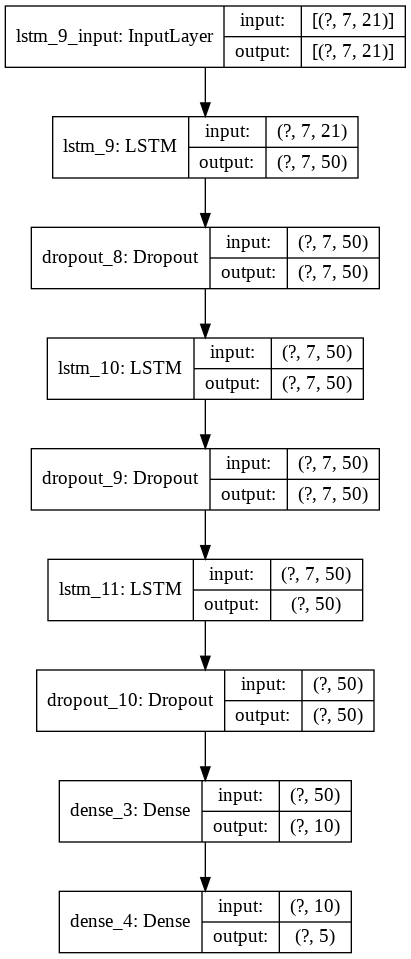

In [49]:
# The LSTM architecture
model_LSTM_2 = Sequential()
# First LSTM layer with Dropout regularisation
model_LSTM_2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_array.shape[1],X_train_array.shape[2]))) # 5 timesteps, 21 feature
model_LSTM_2.add(Dropout(0.2))
# Third LSTM layer
model_LSTM_2.add(LSTM(units=50, return_sequences=True))
model_LSTM_2.add(Dropout(0.2))
# Fourth LSTM layer
model_LSTM_2.add(LSTM(units=50))
model_LSTM_2.add(Dropout(0.2))
# The output layer
model_LSTM_2.add(Dense(10))
model_LSTM_2.add(Dense(n_steps_out))

# Compiling the RNN
model_LSTM_2.compile(optimizer='adam', loss='mse')
model_LSTM_2.summary()
plot_model(model_LSTM_2, show_shapes=True, show_layer_names=True)

In [50]:
callbacks = [EarlyStopping(monitor="val_loss", patience=2, #2 or 1 thoi
                           mode='min',restore_best_weights=True),
            ]
history = model_LSTM_2.fit(X_train_array, y_train_array, epochs=20, 
                    validation_split=0.2, verbose=1,callbacks=callbacks)

Epoch 1/20
14726/14726 [==============================] - 102s 7ms/step - loss: 1.3007 - val_loss: 1.1877
Epoch 2/20
14726/14726 [==============================] - 103s 7ms/step - loss: 1.2773 - val_loss: 1.1460
Epoch 3/20
14726/14726 [==============================] - 103s 7ms/step - loss: 1.2864 - val_loss: 1.1384
Epoch 4/20
14726/14726 [==============================] - 102s 7ms/step - loss: 1.2863 - val_loss: 1.1173
Epoch 5/20
14726/14726 [==============================] - 102s 7ms/step - loss: 1.2863 - val_loss: 1.1520
Epoch 6/20
14726/14726 [==============================] - 103s 7ms/step - loss: 1.2864 - val_loss: 1.1448


In [51]:
y_test_pred=model_LSTM_2.predict(X_test_array)
print('test rmse:', np.sqrt(mean_squared_error(y_test_array, y_test_pred)))
print('test mae:', mean_absolute_error(y_test_array, y_test_pred))

test rmse: 1.1460266406359247
test mae: 0.9370708424235886


## Many to one

In [70]:
split_number=0.80
n_steps_in  = 7
n_steps_out = 1

split=int(len(df) * split_number)
training_set=df[:split]
test_set=df[split:]
predict_future=len(test_set)

In [95]:
# split a univariate sequence into samples
def split_sequence(X,y,n_steps_in, n_steps_out):
  X_prepare, y_prepare = list(), list()
  for i in range(len(X)):
    #if i==5: 
    #  break
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
    if out_end_ix > len(X):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = X[i:end_ix], y[end_ix:out_end_ix]
    X_prepare.append(seq_x)
    y_prepare.append(seq_y)
  #return X_prepare,y_prepare
  return array([np.array(X) for X in X_prepare]), array([np.array(y) for y in y_prepare])

In [96]:
X=training_set.drop(['date','% Silica Concentrate','% Iron Concentrate'],axis=1)
y=training_set['% Silica Concentrate']

In [97]:
X_train_array, y_train_array = split_sequence(X,y, n_steps_in, n_steps_out)

In [98]:
print(X_train_array.shape)
print(y_train_array.shape)

(589018, 7, 21)
(589018, 1)


In [100]:
#prepare test set
inputs=df[len(df)-len(test_set) - n_steps_in:]
X=inputs.drop(['date','% Silica Concentrate','% Iron Concentrate'],axis=1)
y=inputs['% Silica Concentrate']

X_test_array, y_test_array = split_sequence(X,y, n_steps_in, n_steps_out)
print(X_test_array.shape)
print(y_test_array.shape)

(147257, 7, 21)
(147257, 1)


In [101]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, X_train_array.shape[2]))) # 7 timesteps, 21 feature
model.add(Dense(10))
model.add(Dense(1)) # one timestep
model.compile(optimizer='adam', loss='mse')

callbacks = [EarlyStopping(monitor="val_loss", patience=2, #2 or 1 thoi
                           mode='min',restore_best_weights=True),
            ]
history = model.fit(X_train_array, y_train_array, epochs=20, 
                    validation_split=0.2, verbose=1,callbacks=callbacks)

Epoch 1/20
14726/14726 [==============================] - 191s 13ms/step - loss: 66.5631 - val_loss: 1.2131
Epoch 2/20
14726/14726 [==============================] - 191s 13ms/step - loss: 1.3684 - val_loss: 1.1721
Epoch 3/20
14726/14726 [==============================] - 192s 13ms/step - loss: 1.1261 - val_loss: 1.0840
Epoch 4/20
14726/14726 [==============================] - 190s 13ms/step - loss: 1.0856 - val_loss: 1.1146
Epoch 5/20
14726/14726 [==============================] - 189s 13ms/step - loss: 1.0768 - val_loss: 1.1046


In [102]:
y_test_pred=model.predict(X_test_array)
print('test rmse:', np.sqrt(mean_squared_error(y_test_array, y_test_pred)))
print('test mae:', mean_absolute_error(y_test_array, y_test_pred))

test rmse: 1.0970361354268081
test mae: 0.8541212111263093


In [103]:
y_test_array

array([[1.73],
       [1.73],
       [1.73],
       ...,
       [1.71],
       [1.71],
       [1.71]])

In [104]:
y_test_pred

array([[1.8873346],
       [2.3233747],
       [1.6624761],
       ...,
       [2.1276035],
       [2.2259192],
       [2.5825956]], dtype=float32)

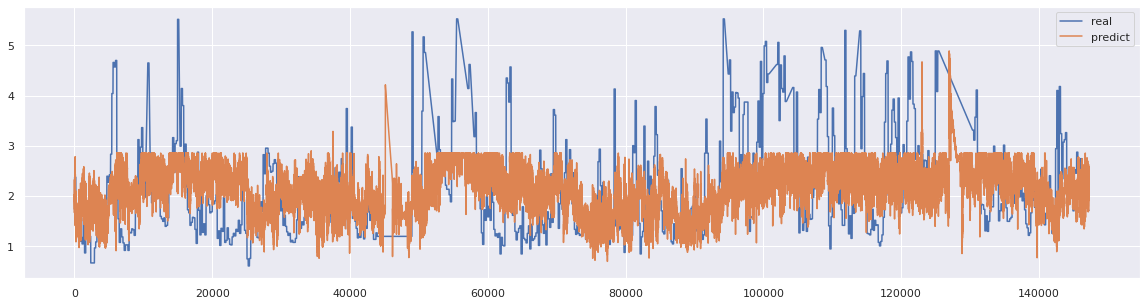

In [109]:
plt.figure(figsize=(20,5))
plt.plot(y_test_array,label='real')
plt.plot(y_test_pred,label='predict')
plt.legend()
plt.show()